# Plausible web analysis

In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from hsfparana.mpl_utils import set_date_xaxis
from hsfparana.colors import iris_hep_colors as colors

plt.style.use("science")
plt.style.use("notebook")

data_dir = Path(".").resolve().parent / "data" / "plausible"
assert data_dir.is_dir()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
pages = pd.read_csv(data_dir / "pages.csv")
visitors = pd.read_csv(data_dir / "visitors.csv", parse_dates=["date"])

In [31]:
visitors.tail()

,date,visitors,pageviews,bounce_rate,visit_duration
7,2023-07-17,3567,5673,86,85
8,2023-07-24,3277,4737,87,57
9,2023-07-31,3238,4858,87,62
10,2023-08-07,3152,4686,87,57
11,2023-08-14,3039,4371,88,53


In [32]:
# Exclude potential leading partial row
visitors = visitors.query("visitors > 1000").copy()
dates = visitors.date.tolist()
dates += [dates[-1] + datetime.timedelta(days=7)]

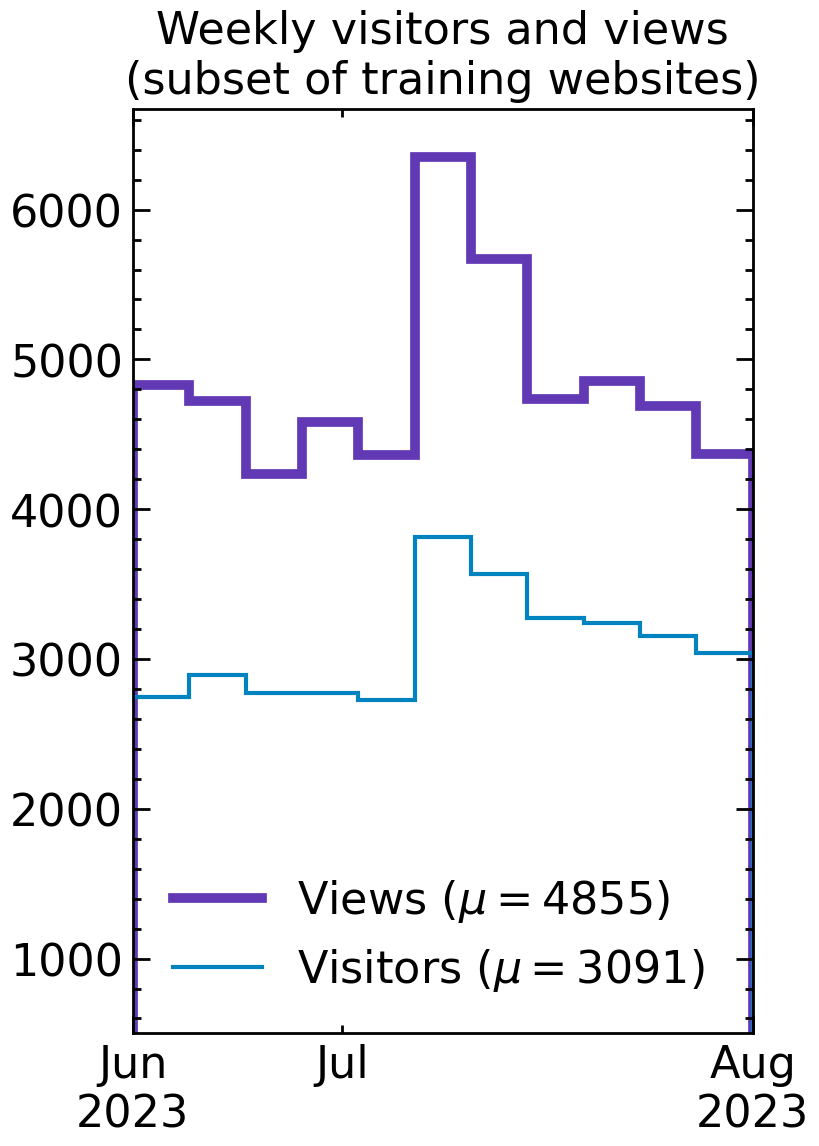

In [33]:
fig, ax = plt.subplots(figsize=(4, 6), dpi=200)
ax.stairs(
    visitors.pageviews,
    edges=dates,
    lw=3.5,
    label=f"Views ($\\mu={visitors.pageviews.mean():.0f}$)",
    color=colors[0],
)
ax.stairs(
    visitors.visitors,
    edges=dates,
    lw=1.5,
    label=f"Visitors ($\\mu={visitors.visitors.mean():.0f}$)",
    color=colors[1],
)
set_date_xaxis(ax, start_date=str(dates[0]), end_date=dates[-1])
ax.legend()
ax.set_ylim(500, None)
ax.set_title("Weekly visitors and views\n(subset of training websites)", fontsize=16)
fig.savefig("plausible.png")